# Setting Everything Up

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
#import the file from the web
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unicodedata import normalize
import re
from datetime import datetime
from pandas import read_csv 
from sklearn.feature_extraction.text import CountVectorizer

# I can give a number or use None to remove maximum ceiling & display all columns
pd.options.display.max_columns = None

# # I want to be able to see the entire narrative, so remove the maximum width for each column
# pd.options.display.max_colwidth = None

# pd.options.display.float_format = '{:,.2f}'.format

import string

%matplotlib inline

In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 8)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 1.0.0 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
#To Download PDFs
from urllib.parse import urljoin

In [7]:
#To import camelot and PDF-related items
import camelot
import ghostscript
import sys

In [8]:
%%R

library(jpeg)
library(wordcloud)
library(RColorBrewer)
library(wordcloud2)
library(tm)
library(ggrepel)

R[write to console]: Loading required package: RColorBrewer

R[write to console]: Loading required package: NLP

R[write to console]: 
Attaching package: ‘NLP’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    annotate




In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Is there a difference between the top scores of candidates in Kenya's national examinations on years when there is an election compared to years where there is none?



KCPE: Kenya Certificate of Primary Education, a national exam taken by students in grade 8 across the country, usually about 12 to 14 years old. <br/>
KCPE: Kenya Certificate of Secondary Education, a national exam taken by students in Form 4 across the country, usually about 16 to 18 years old.

#### Null hypothesis:
There is no difference between the top scores of candidates in Kenya's national examinations on years when there is an election compared to years where there is none.

# Create Dataframes for KCPE and KCSE results collected

Created these from the manually collected data from a combination of online sources which I have included in the dataset.
To learn more about the collection, process, you can look at the cleaning notebook in this repository entitled cleaning_and_scratchpad_exams.ipynb

In [11]:
df_kcse=pd.read_csv('kcse.csv')
df_kcpe=pd.read_csv('kcpe.csv')

In [12]:
df_kcpe

,year,scored_401to500,over_400_pct,scored_301to400,scored_201to300,scored_101to200,scored_001to100,Number_sat,Highest_Mark,president,pres_change,cabinet_secretary,cabinet_change,election_year,Source1,Source2,Source3
0,2022,9443.0,0.765327,307756.0,619593,296336.0,24.0,1233852.0,431.0,William Ruto,yes,George Magoha,no,yes,https://www.standardmedia.co.ke/education/arti...,NaN,NaN
1,2021,11857.0,0.967371,315275.0,578197,307532.0,1170.0,1225693.0,428.0,Uhuru Kenyatta,no,George Magoha,no,no,https://shahidinews.co.ke/2022/03/28/kcpe-2021...,https://mtotonewsblog.wordpress.com/2022/03/29...,NaN
2,2020,8091.0,0.686125,282090.0,"589,027",299677.0,307.0,1179232.0,433.0,Uhuru Kenyatta,no,George Magoha,no,no,NaN,NaN,NaN
3,2019,9770.0,0.901744,243320.0,566886,262307.0,1173.0,1083456.0,440.0,Uhuru Kenyatta,no,George Magoha,yes,no,https://dc.sourceafrica.net/documents/119796-2...,NaN,NaN
4,2018,11559.0,1.098384,223862.0,574173,240178.0,2592.0,1052364.0,453.0,Uhuru Kenyatta,no,Amina Mohamed,yes,no,https://dc.sourceafrica.net/documents/119796-2...,NaN,NaN
5,2017,9846.0,0.990824,217307.0,529897,234308.0,2360.0,993718.0,455.0,Uhuru Kenyatta,no,Fred Matiangi,no,yes,https://dc.sourceafrica.net/documents/119796-2...,NaN,NaN
6,2016,5190.0,0.550943,207141.0,505552,221438.0,6747.0,942021.0,437.0,Uhuru Kenyatta,no,Fred Matiangi,yes,no,https://www.capitalfm.co.ke/news/2016/12/top-2...,NaN,NaN
7,2015,7000.0,0.746693,201986.0,499568,215614.0,3061.0,937467.0,449.0,Uhuru Kenyatta,no,Jacob Kaimenyi,no,no,https://www.capitalfm.co.ke/news/2015/12/the-t...,https://ebru.co.ke/kcpe-analysis-for-2017-2016...,NaN
8,2014,7000.0,0.797569,201986.0,499568,215614.0,3061.0,877667.0,441.0,Uhuru Kenyatta,no,Jacob Kaimenyi,yes,no,http://alexkuria.blogspot.com/2015/01/2014-ove...,NaN,https://archive.etelej.com/post/kcpe-2014-results
9,2013,NaN,NaN,NaN,NaN,NaN,NaN,839759.0,444.0,Uhuru Kenyatta,yes,Mutula Kilonzo,no,yes,https://www.slideshare.net/erykkoh/appendix-d2...,NaN,NaN


# Reading KCPE and KCSE Data in R

In [13]:
%%R 

df_kcse_r <- read_csv('kcse.csv', show_col_types = FALSE)
df_kcpe_r <- read_csv('kcpe.csv', show_col_types = FALSE)

# Are examination results in election years  different from results in other years?

## Starting with KCPE, that is, the Kenya Certificate for Primary Education exam

#### Null hypothesis:
There is no difference between the top scores of candidates in Kenya's national examinations for primary schools, that is KCPE, on years when there is an election compared to years where there is none.

### Percent scoring over 400 in KCPE

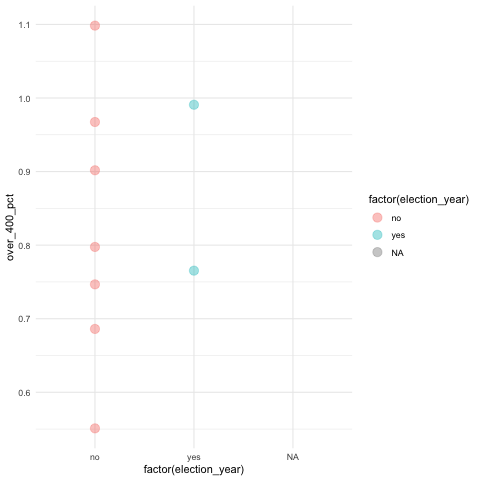

In [14]:
%%R

ggplot(df_kcpe_r) +
    aes(x=factor(election_year), y=over_400_pct, color=factor(election_year)) +
    geom_point(size=4, alpha=.4) +
    theme_minimal()



👉 Summary

In this chart, I plot the percent of candidates that got a score above 400 in their KCPE exams. 

👉 Reflection

What I can conclude based on this chart:
* This chart is helpful for seeing the percent of candidates that got a score above 400 in their KCPE by year.
* It appears that it is possible that the election years are not very influential on the  scores in the top band but a t-test will be necessary to check if that is true or not 


What I can't conclude based on this chart:
* The election years and non-election year results appear to be randomly distributed but I cannot know for sure before I run a t-test. (that is, it seems that the data could have come from a singular distribution?)
* I do not have a sense of whether the difference between the scores in the election years and those in the non-election years is significant. For that, I will need a t-test. 



# Now do a t-test to check if there is a difference

In [24]:
%%R 

df_election = df_kcpe_r %>% filter(election_year=='yes')
df_no_election = df_kcpe_r %>% filter(election_year=='no')

t.test(df_election$over_400_pct, df_no_election$over_400_pct)


	Welch Two Sample t-test

data:  df_election$over_400_pct and df_no_election$over_400_pct
t = 0.42919, df = 1.8559, p-value = 0.7124
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5573069  0.6709355
sample estimates:
mean of x mean of y 
0.8780756 0.8212613 



👉 Summary

In this t-test, I test whether the difference between the scores in the election years and those in the non-election years is significant.


👉 Reflection

What I can conclude based on this test:
* The p-value in this case is large at 0.7, indicating there is no statistically significant difference between examination results in election years compared to other years. This is a conclusion that can be supported by the initial plotting of the data which showed the data may be randomly distributed.

What I can't conclude based on this test:
* I cannot make a global conclusion about a lack of correlation between election years and exam results because the plotting reveals only about 20% of the data is from election years. Perhaps more data would more reliably help make one conclusion or other


## Running the test for highest mark in KCPE rather than percent of candidates scoring in the highest band (400-500)

Just running this to cover my bases but I like the 400-500 band test better because it tests a group which seems like it could give more information than top individuals. 

#### Starting with plotting

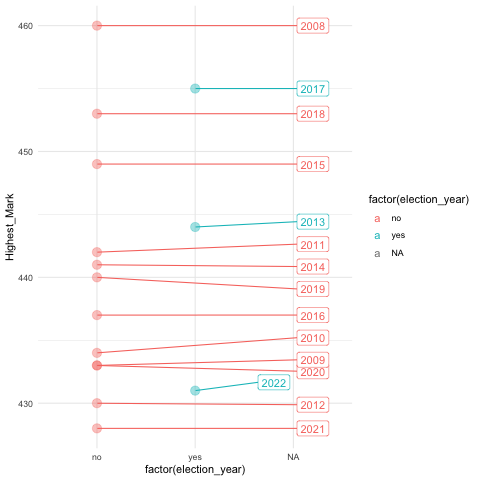

In [25]:
%%R

ggplot(df_kcpe_r) +
    aes(x=factor(election_year), y=Highest_Mark, color=factor(election_year), label = year) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()

#### To get a cleaner version of the plot to make it more visible

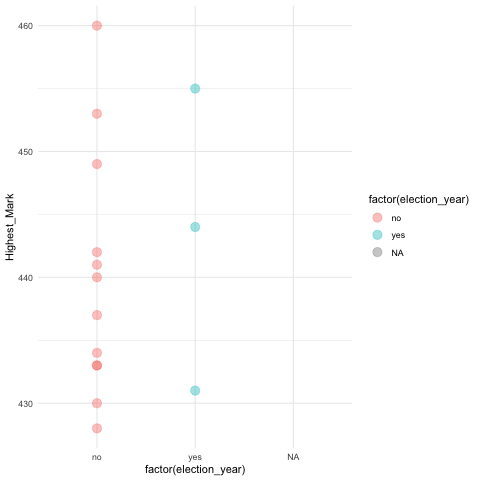

In [27]:
%%R

#cleaner version
ggplot(df_kcpe_r) +
    aes(x=factor(election_year), y=Highest_Mark, color=factor(election_year)) +
    geom_point(size=4, alpha=.4) +
    theme_minimal()

👉 Summary

In this chart, I plot the candidate that got the highest top individual score in their KCPE exams. 

👉 Reflection

What I can conclude based on this chart:
* This chart is helpful for seeing the trend of highest top individual scores in their KCPE exams by year.  
* It appears that it is possible that the election years are not very influential on the top individual scores but a t-test will be necessary to check if that is true or not 


What I can't conclude based on this chart:
* The election years and non-election year top individual scores appear to be randomly distributed but I cannot know for sure before I run a t-test. (that is, it seems that the data could have come from a singular distribution?)
* I do not have a sense of whether the difference between the top individual scores in the election years and those in the non-election years is significant. For that, I will need a t-test. 



# Now do a t-test to check if there is a difference

In [29]:
%%R 

df_election = df_kcpe_r %>% filter(election_year=='yes')
df_no_election = df_kcpe_r %>% filter(election_year=='no')

t.test(df_election$Highest_Mark, df_no_election$Highest_Mark)


	Welch Two Sample t-test

data:  df_election$Highest_Mark and df_no_election$Highest_Mark
t = 0.44542, df = 2.697, p-value = 0.6893
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -22.07092  28.73759
sample estimates:
mean of x mean of y 
 443.3333  440.0000 



👉 Summary

In this t-test, I test whether the difference between the top individual scores in the election years and those in the non-election years is significant.


👉 Reflection

What I can conclude based on this test:
* The p-value in this case is large at 0.69, indicating there is no statistically significant difference between top individual scores for examination results in election years compared to other years. This is a conclusion that can be supported by the initial plotting of the data which showed the data may be randomly distributed.

What I can't conclude based on this test:
* I cannot make a global conclusion about a lack of correlation between election years and top individual scores because the plotting reveals only about 20% of the data is from election years. Perhaps more data would more reliably help make one conclusion or other


## For KCSE, that is, the Kenya Certificate for Secondary Education exam

#### Null hypothesis:
There is no difference between the top scores of candidates in Kenya's national examinations for secondary schools, that is KCSE, on years when there is an election compared to years where there is none.# For KCSE

In [18]:
df_kcse

,year,candidates,min_uni_Cplus_scored,min_uni_Cplus_pct,scored_A,scored_Aminus,total_A,A_pct,Bplus,Bplain,Bminus,Cplus,Cplain,Cminus,Dplus,Dplain,Dminus,scored_E,special_needs_Cplus,special_needs_total,exams cancelled,subjects_improving,top_grade,election_year,president,pres_change,cabinet_secretary,cabinet_change,date,Source1,Source2
0,2022,881416,173345,19.666650,1146.0,6407,7553.0,0.856917,15682,31303,48719,70088,95154,119068,135021,155480,167758,30822.0,190.0,NaN,NaN,17.0,NaN,yes,William Ruto,yes,George Magoha,no,NaN,https://www.citizen.digital/news/2022-kcse-res...,https://educationnewshub.co.ke/2022-kcse-resul...
1,2021,831026,145776,17.541689,1138.0,"5,973",7111.0,0.855689,"13,463","25,035","39,683","59,843","81,345","99,406","116,355","145,916","187,264",46151.0,NaN,NaN,441.0,11.0,NaN,no,Uhuru Kenyatta,no,George Magoha,no,NaN,https://sokodirectory.com/2022/04/kcse-2021-ov...,NaN
2,2020,743299,143140,19.257392,893.0,6420,7313.0,0.983857,14427,25207,38194,57999,85458,109454,117898,121942,137361,28046.0,NaN,NaN,287.0,NaN,87.000,no,Uhuru Kenyatta,no,George Magoha,no,NaN,https://www.pd.co.ke/news/kcse-2020-overall-pe...,NaN
3,2019,679222,125746,18.513240,627.0,5796,6423.0,0.945641,13366,24478,35340,46139,63102,83358,101687,137713,152339,29318.0,NaN,1309.0,NaN,NaN,87.159,no,Uhuru Kenyatta,no,George Magoha,yes,NaN,https://educationnewshub.co.ke/kcse-2019-mean-...,NaN
4,2018,"642,204",90377,14.072943,315.0,3417,3732.0,0.581124,8268,16403,26156,35818,NaN,NaN,NaN,NaN,NaN,NaN,88.0,1499.0,NaN,14.0,87.640,no,Uhuru Kenyatta,no,Amina Mohamed,yes,NaN,https://www.schoolsnetkenya.com/an-analysis-of...,NaN
5,2017,660204,70073,10.613841,142.0,2714,2856.0,0.432594,7344,12628,19385,27860,40474,61040,88447,135550,179381,35356.0,NaN,NaN,NaN,13.0,87.011,yes,Uhuru Kenyatta,no,Fred Matiangi,no,NaN,https://kenyapage.net/education/kcse-results-2...,NaN
6,2016,577253,88928,15.405377,141.0,4645,4786.0,0.829099,10975,17216,23745,32207,44792,61026,80951,112135,149929,33399.0,NaN,NaN,NaN,NaN,NaN,no,Uhuru Kenyatta,no,Fred Matiangi,yes,NaN,https://kenyapage.net/education/kcse-results-2...,https://kcpe-kcse.com/kcse-2016-results/
7,2015,525724,169492,32.239730,2685.0,12069,14754.0,2.806416,21927,33460,44581,54770,64913,74115,79157,79555,48658,5350.0,NaN,NaN,5101.0,NaN,NaN,no,Uhuru Kenyatta,no,Jacob Kaimenyi,no,NaN,https://kcseresults2015.wordpress.com/2016/03/...,https://kcpe-kcse.com/kcse-2016-results/kcse-2...
8,2014,483630,149717,30.956930,3073.0,11768,14841.0,3.068668,19814,29319,38315,47428,58688,70677,76198,73501,47716,5636.0,180.0,1090.0,2975.0,15.0,NaN,no,Uhuru Kenyatta,no,Jacob Kaimenyi,yes,NaN,https://archive.etelej.com/post/kcse-2014-resu...,https://weeklycitizennewspaper.blogspot.com/20...
9,2013,446696,123365,27.617216,2722.0,9759,12481.0,2.794070,17013,24656,30864,38351,48571,60763,71803,78177,55793,7042.0,NaN,NaN,NaN,14.0,NaN,yes,Uhuru Kenyatta,yes,Mutula Kilonzo,no,NaN,https://studylib.net/doc/9912410/2014-kcse-exa...,NaN


## Percent scoring A or A minus in KCSE

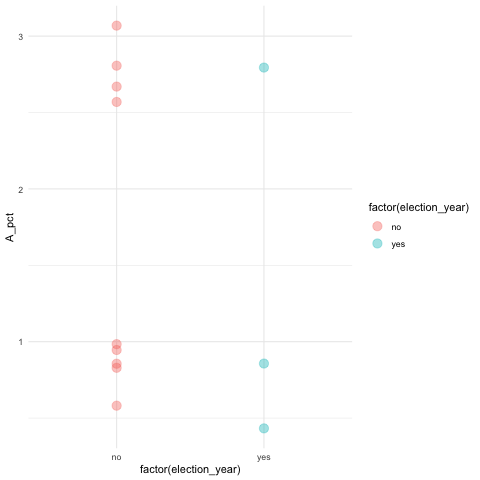

In [20]:
%%R

ggplot(df_kcse_r) +
    aes(x=factor(election_year), y=A_pct, color=factor(election_year)) +
    geom_point(size=4, alpha=.4) +
    theme_minimal()

👉 Summary

In this chart, I plot the percent of candidates that got a score of A or A minus in their KCSE exams, the highest grade bands in the exams. 

👉 Reflection

What I can conclude based on this chart:
* This chart is helpful for seeing the percent of candidates that got a score of A or A minus in their KCSE by year.
* It appears that it is possible that the election years are not very influential on the  scores in the top band but a t-test will be necessary to check if that is true or not 
* The plotting however reveals that the percentage of candidates making the highest scores are roughly distributed in two different clusters, meaning something other than the election years could be significantly affecting the percentage of top scorers. (Note: In preliminary analysis in the scratchpad, it appeared cabinet secretaries were more influential in the kinds of results candidates got than election years)


What I can't conclude based on this chart: 
* I do not have a sense of whether the ditfference between the scores in the election years and those in the non-election years is significant. For that, I will need a t-test. 
* Since it is possible other variables are affecting the distribution, I do not know yet which variable could be affecting the top scores.

In [31]:
%%R 

df_election = df_kcse_r %>% filter(election_year=='yes')
df_no_election = df_kcse_r %>% filter(election_year=='no')

t.test(df_election$A_pct, df_no_election$A_pct)


	Welch Two Sample t-test

data:  df_election$A_pct and df_no_election$A_pct
t = -0.42225, df = 2.9684, p-value = 0.7016
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.916530  2.236884
sample estimates:
mean of x mean of y 
 1.361193  1.701016 



👉 Summary

In this t-test, I test whether the difference between the scores in the election years and those in the non-election years is significant in the KCSE exams.


👉 Reflection

What I can conclude based on this test:
* The p-value in this case is higher than 0.1 at 0.7, indicating there is no statistically significant difference between examination results in election years compared to other years. This is a conclusion that can be supported by the initial plotting of the data which showed the data may be randomly distributed.

What I can't conclude based on this test:
* I cannot make a global conclusion about a lack of correlation between election years and exam results because the plotting reveals only about 25% of the data is from election years. Perhaps more data would more reliably help make one conclusion or other
